In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score
from sklearn.neighbors import KNeighborsClassifier

In [3]:
# bez resamplovanja
%store -r X_train
%store -r X_test
%store -r y_train
%store -r y_test
# sa SMOTE upsamplovanjem
%store -r X_train_smote
%store -r y_train_smote
# sa SMOTE upsamplovanjem i PCA
%store -r X_train_smote_pca
%store -r X_test_smote_pca
# sa SMOTE upsamplovanjem i LDA
%store -r X_train_smote_lda
%store -r X_test_smote_lda

In [8]:
# KNN bez resamplovanja
# KNN gde je n = 3
# daje dobre rezultate
knn_classifier_3 = KNeighborsClassifier(n_neighbors = 3, p = 2, metric = 'minkowski')
knn_classifier_3.fit(X_train, y_train)
y_pred_knn_3 = knn_classifier_3.predict(X_test)

In [9]:
print('Performanse KNN za 3 suseda bez resamplovanja:\n')
print(confusion_matrix(y_test, y_pred_knn_3))
print('\n')
print(classification_report(y_test, y_pred_knn_3))
print('\n')
print('Accuracy:', round(accuracy_score(y_test, y_pred_knn_3), 5))
print('Precision:', round(precision_score(y_test, y_pred_knn_3, average='weighted'), 5))
print('Recall:', round(recall_score(y_test, y_pred_knn_3, average='weighted'), 5))
print('F1 Score:', round(f1_score(y_test, y_pred_knn_3, average='weighted'), 5))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_knn_3))

Performanse KNN za 3 suseda bez resamplovanja:

[[284263  15327   2454    973    387    131]
 [ 24423  50672   8305   1161    326     68]
 [  7731  10988  28871   5338    711    111]
 [  3509   2857   6783  19165   2929    267]
 [  1571    931   1616   3663   9948   1276]
 [   454    243    304    522   1353   4480]]


              precision    recall  f1-score   support

           0       0.88      0.94      0.91    303535
           1       0.63      0.60      0.61     84955
           2       0.60      0.54      0.57     53750
           3       0.62      0.54      0.58     35510
           4       0.64      0.52      0.57     19005
           5       0.71      0.61      0.65      7356

    accuracy                           0.79    504111
   macro avg       0.68      0.62      0.65    504111
weighted avg       0.78      0.79      0.78    504111



Accuracy: 0.78832
Precision: 0.77881
Recall: 0.78832
F1 Score: 0.7824
Cohen Kappa Score: 0.6302392639144261


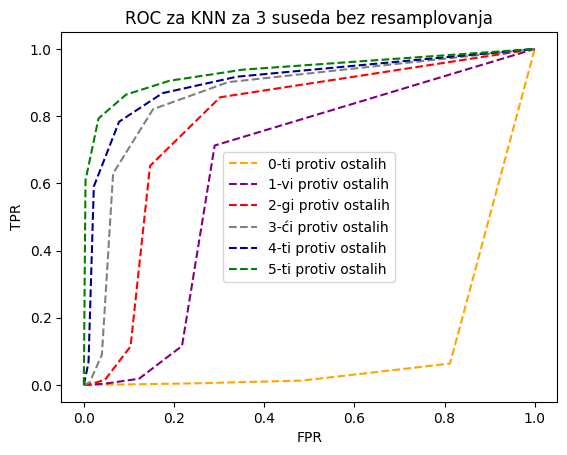

In [10]:
fp_rate = dict()
tp_rate = dict()

for i in range(6):    
    fp_rate[i], tp_rate[i], _ = roc_curve(y_test, y_pred_knn_3, pos_label=i)

plt.plot(fp_rate[0], tp_rate[0], linestyle='--',color='orange', label='0-ti protiv ostalih')
plt.plot(fp_rate[1], tp_rate[1], linestyle='--',color='purple', label='1-vi protiv ostalih')
plt.plot(fp_rate[2], tp_rate[2], linestyle='--',color='red', label='2-gi protiv ostalih')
plt.plot(fp_rate[3], tp_rate[3], linestyle='--',color='gray', label='3-ći protiv ostalih')
plt.plot(fp_rate[4], tp_rate[4], linestyle='--',color='darkblue', label='4-ti protiv ostalih')
plt.plot(fp_rate[5], tp_rate[5], linestyle='--',color='green', label='5-ti protiv ostalih')

plt.title('ROC za KNN za 3 suseda bez resamplovanja')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='best')

In [19]:
# KNN gde je n = 30
# daje osrednje rezultate
knn_classifier_30 = KNeighborsClassifier(n_neighbors = 30, p = 2, metric = 'minkowski')
knn_classifier_30.fit(X_train, y_train)
y_pred_knn_30 = knn_classifier_30.predict(X_test)

In [20]:
print('Performanse KNN za 30 suseda bez resamplovanja:\n')
print(confusion_matrix(y_test, y_pred_knn_30))
print('\n')
print(classification_report(y_test, y_pred_knn_30))
print('\n')
print('Accuracy:', round(accuracy_score(y_test, y_pred_knn_30), 5))
print('Precision:', round(precision_score(y_test, y_pred_knn_30, average='weighted'), 5))
print('Recall:', round(recall_score(y_test, y_pred_knn_30, average='weighted'), 5))
print('F1 Score:', round(f1_score(y_test, y_pred_knn_30, average='weighted'), 5))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_knn_30))

Performanse KNN za 30 suseda bez resamplovanja:

[[290942   8234   2449   1262    501    147]
 [ 46627  29768   6021   1784    610    145]
 [ 20430   9056  18385   4523   1130    226]
 [ 10641   3058   5909  13077   2486    339]
 [  4743   1067   1634   3658   6951    952]
 [  1573    308    409    603   1386   3077]]


              precision    recall  f1-score   support

           0       0.78      0.96      0.86    303535
           1       0.58      0.35      0.44     84955
           2       0.53      0.34      0.42     53750
           3       0.53      0.37      0.43     35510
           4       0.53      0.37      0.43     19005
           5       0.63      0.42      0.50      7356

    accuracy                           0.72    504111
   macro avg       0.59      0.47      0.51    504111
weighted avg       0.69      0.72      0.69    504111



Accuracy: 0.71849
Precision: 0.68718
Recall: 0.71849
F1 Score: 0.68836
Cohen Kappa Score: 0.46171558221334674


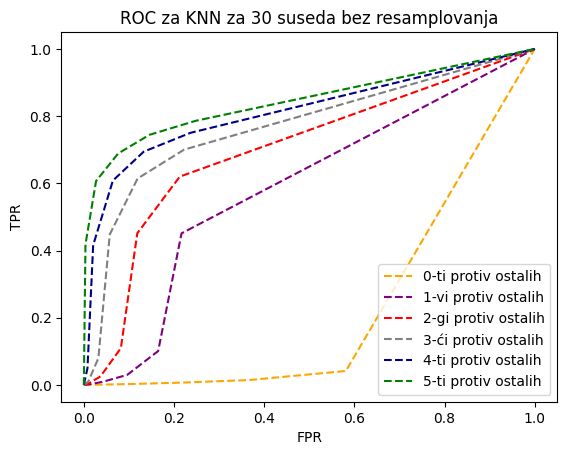

In [21]:
fp_rate = dict()
tp_rate = dict()

for i in range(6):    
    fp_rate[i], tp_rate[i], _ = roc_curve(y_test, y_pred_knn_30, pos_label=i)

plt.plot(fp_rate[0], tp_rate[0], linestyle='--',color='orange', label='0-ti protiv ostalih')
plt.plot(fp_rate[1], tp_rate[1], linestyle='--',color='purple', label='1-vi protiv ostalih')
plt.plot(fp_rate[2], tp_rate[2], linestyle='--',color='red', label='2-gi protiv ostalih')
plt.plot(fp_rate[3], tp_rate[3], linestyle='--',color='gray', label='3-ći protiv ostalih')
plt.plot(fp_rate[4], tp_rate[4], linestyle='--',color='darkblue', label='4-ti protiv ostalih')
plt.plot(fp_rate[5], tp_rate[5], linestyle='--',color='green', label='5-ti protiv ostalih')

plt.title('ROC za KNN za 30 suseda bez resamplovanja')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='best')

In [15]:
# KNN gde je n = 70
# daje slabe rezultate
knn_classifier_7 = KNeighborsClassifier(n_neighbors = 70, p = 2, metric = 'minkowski')
knn_classifier_7.fit(X_train, y_train)
y_pred_knn_7 = knn_classifier_7.predict(X_test)

In [25]:
print('Performanse KNN za 70 suseda bez resamplovanja:\n')
print(confusion_matrix(y_test, y_pred_knn_7))
print('\n')
print(classification_report(y_test, y_pred_knn_7))
print('\n')
print('Accuracy:', round(accuracy_score(y_test, y_pred_knn_7), 5))
print('Precision:', round(precision_score(y_test, y_pred_knn_7, average='weighted'), 5))
print('Recall:', round(recall_score(y_test, y_pred_knn_7, average='weighted'), 5))
print('F1 Score:', round(f1_score(y_test, y_pred_knn_7, average='weighted'), 5))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_knn_7))

Performanse KNN za 70 suseda bez resamplovanja:

[[294784   5357   1851   1005    414    124]
 [ 60096  18336   4281   1584    547    111]
 [ 30549   6811  11879   3353    935    223]
 [ 16976   2862   4696   8789   1852    335]
 [  8073   1125   1579   2870   4657    701]
 [  2654    352    430    578   1148   2194]]


              precision    recall  f1-score   support

           0       0.71      0.97      0.82    303535
           1       0.53      0.22      0.31     84955
           2       0.48      0.22      0.30     53750
           3       0.48      0.25      0.33     35510
           4       0.49      0.25      0.33     19005
           5       0.59      0.30      0.40      7356

    accuracy                           0.68    504111
   macro avg       0.55      0.37      0.41    504111
weighted avg       0.63      0.68      0.62    504111



Accuracy: 0.67572
Precision: 0.63068
Recall: 0.67572
F1 Score: 0.62036
Cohen Kappa Score: 0.33318788193769855


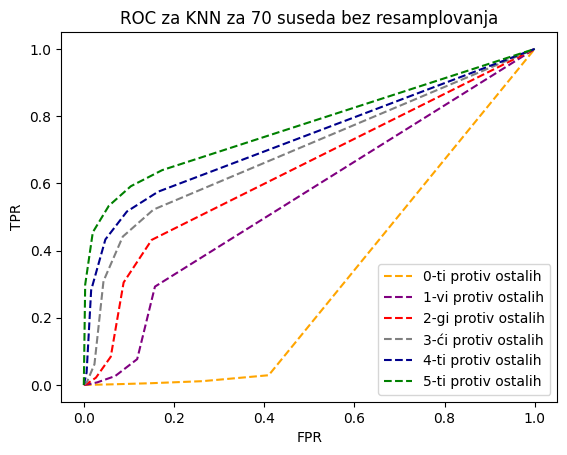

In [26]:
fp_rate = dict()
tp_rate = dict()

for i in range(6):    
    fp_rate[i], tp_rate[i], _ = roc_curve(y_test, y_pred_knn_7, pos_label=i)

plt.plot(fp_rate[0], tp_rate[0], linestyle='--',color='orange', label='0-ti protiv ostalih')
plt.plot(fp_rate[1], tp_rate[1], linestyle='--',color='purple', label='1-vi protiv ostalih')
plt.plot(fp_rate[2], tp_rate[2], linestyle='--',color='red', label='2-gi protiv ostalih')
plt.plot(fp_rate[3], tp_rate[3], linestyle='--',color='gray', label='3-ći protiv ostalih')
plt.plot(fp_rate[4], tp_rate[4], linestyle='--',color='darkblue', label='4-ti protiv ostalih')
plt.plot(fp_rate[5], tp_rate[5], linestyle='--',color='green', label='5-ti protiv ostalih')

plt.title('ROC za KNN za 70 suseda bez resamplovanja')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='best')

In [22]:
# KNN sa SMOTE
# KNN gde je n = 3
# daje dobre rezultate
knn_classifier_smote_3 = KNeighborsClassifier(n_neighbors = 3, p = 2, metric = 'minkowski')
knn_classifier_smote_3.fit(X_train_smote, y_train_smote)
y_pred_knn_smote_3 = knn_classifier_smote_3.predict(X_test)

In [23]:
print('Performanse KNN za 3 suseda sa SMOTE:\n')
print(confusion_matrix(y_test, y_pred_knn_3))
print('\n')
print(classification_report(y_test, y_pred_knn_smote_3))
print('\n')
print('Accuracy:', round(accuracy_score(y_test, y_pred_knn_smote_3), 5))
print('Precision:', round(precision_score(y_test, y_pred_knn_smote_3, average='weighted'), 5))
print('Recall:', round(recall_score(y_test, y_pred_knn_smote_3, average='weighted'), 5))
print('F1 Score:', round(f1_score(y_test, y_pred_knn_smote_3, average='weighted'), 5))
print('Cohen Kappa Score:',cohen_kappa_score(y_test, y_pred_knn_smote_3))

Performanse KNN za 3 suseda sa SMOTE:

[[284263  15327   2454    973    387    131]
 [ 24423  50672   8305   1161    326     68]
 [  7731  10988  28871   5338    711    111]
 [  3509   2857   6783  19165   2929    267]
 [  1571    931   1616   3663   9948   1276]
 [   454    243    304    522   1353   4480]]


              precision    recall  f1-score   support

           0       0.95      0.87      0.91    303535
           1       0.60      0.70      0.64     84955
           2       0.57      0.63      0.60     53750
           3       0.58      0.63      0.60     35510
           4       0.57      0.64      0.60     19005
           5       0.62      0.71      0.67      7356

    accuracy                           0.79    504111
   macro avg       0.65      0.70      0.67    504111
weighted avg       0.81      0.79      0.79    504111



Accuracy: 0.78669
Precision: 0.80586
Recall: 0.78669
F1 Score: 0.7941
Cohen Kappa Score: 0.6538815278110031


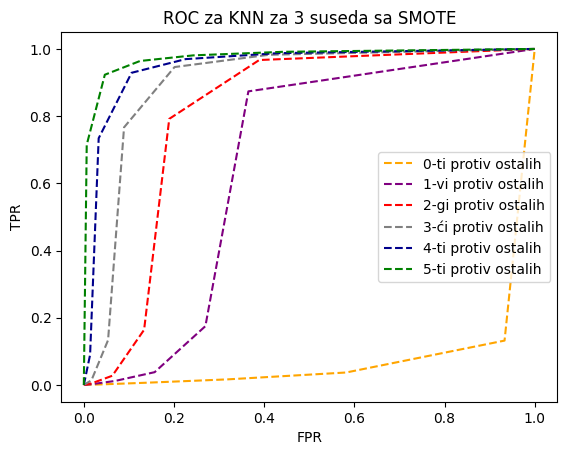

In [24]:
fp_rate = dict()
tp_rate = dict()

for i in range(6):    
    fp_rate[i], tp_rate[i], _ = roc_curve(y_test, y_pred_knn_smote_3, pos_label=i)

plt.plot(fp_rate[0], tp_rate[0], linestyle='--',color='orange', label='0-ti protiv ostalih')
plt.plot(fp_rate[1], tp_rate[1], linestyle='--',color='purple', label='1-vi protiv ostalih')
plt.plot(fp_rate[2], tp_rate[2], linestyle='--',color='red', label='2-gi protiv ostalih')
plt.plot(fp_rate[3], tp_rate[3], linestyle='--',color='gray', label='3-ći protiv ostalih')
plt.plot(fp_rate[4], tp_rate[4], linestyle='--',color='darkblue', label='4-ti protiv ostalih')
plt.plot(fp_rate[5], tp_rate[5], linestyle='--',color='green', label='5-ti protiv ostalih')

plt.title('ROC za KNN za 3 suseda sa SMOTE')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend(loc='best')

AttributeError: 'numpy.ndarray' object has no attribute 'predict'